<a href="https://colab.research.google.com/github/Jaweria-Asif/Automated-News-Categorization-Using-Data-Science-Techniques/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Title**
#**"Automated News Categorization and Analysis Using Machine Learning"**

#**Problem Statement**
With the exponential growth of online news content, manually categorizing and analyzing news articles is time-consuming and inefficient. Dawn's website publishes a variety of news articles daily, making it challenging for users to access information organized by their interests or categories. This project aims to automate the process of categorizing news articles into predefined categories using machine learning models and web scraping techniques. The proposed solution will provide accurate and organized news data, enhancing user experience and enabling efficient data analysis for trends and insights.

#**Business Questions**

1. Which category has the most news articles?
2. Which category generated the highest number of articles on [specific date]?
3. What is the percentage distribution of each news category?
4. How many articles were published in the technology category on its busiest day?
5. What is the peak publication date for the health category, and how many articles were published?"
6. What percentage of news articles relate directly to business and financial markets?
7. Are there noticeable trends in news frequency over time?
8. What are the top-performing categories in terms of engagement (e.g., popularity or readership)?
9. Which category had the fewest articles published on?
10. What are the most common topics or themes across all categories?


#***Importing Libraries***

In [4]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from string import punctuation
nltk.download('stopwords')
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#***Defining News Categories***

In [5]:
CATEGORY_KEYWORDS = {
    # Existing categories...

    "political": ["election", "government", "politics", "minister", "policy", "parliament", "vote", "protest", "strikes", "march"],
    "sports": ["match", "tournament", "goal", "cricket", "football", "player", "team"],
    "country": ["Bangladesh", "Pakistan", "India", "China", "Phalestine", "Iran", "America", "England"],
    "business": ["stock", "market", "business", "company", "trade", "corporate", "investment", "liabilities"],
    "economic": ["economy", "inflation", "GDP", "growth", "finance", "budget"],
    "junk science": ["conspiracy", "fake science", "hoax", "pseudoscience", "myth", "debunked"],
    "technology": ["technology", "AI", "artificial intelligence", "software", "gadgets", "innovation", "cybersecurity"],
    "health": ["health", "medicine", "disease", "COVID", "vaccine", "hospital", "mental health"],
    "entertainment": ["movie", "film", "celebrity", "music", "concert", "award", "Netflix"],
    "environment": ["climate", "environment", "global warming", "pollution", "wildlife"],
    "science": ["research", "discovery", "space", "astronomy", "biology", "physics", "chemistry"],
    "education": ["education", "school", "university", "student", "teacher", "admissions", "exam"],
    "crime": ["crime", "murder", "robbery", "fraud", "scam", "arrest", "police"],
    "travel": ["travel", "tourism", "flight", "destination", "vacation", "hotel"],
    "lifestyle": ["lifestyle", "fashion", "food", "recipe", "fitness", "beauty", "trend"],
    "international": ["international", "global", "foreign", "UN", "world", "abroad"],
    "history": ["history", "ancient", "civilization", "war", "revolution", "archaeology", "historical figures"],
    "art & culture": ["art", "painting", "museum", "exhibition", "artist", "sculpture", "culture", "heritage"],
    "law": ["law", "court", "judge", "lawyer", "rights", "constitution", "legislation"],
    "social issues": ["equality", "human rights", "discrimination", "poverty", "justice", "freedom", "activism"],
    "technology & innovation": ["robotics", "automation", "IoT", "blockchain", "5G", "cloud computing", "virtual reality","AI"],
    "food & drink": ["food", "recipe", "cuisine", "restaurant", "dish", "beverage", "nutrition"],
    "parenting & family": ["parenting", "children", "family", "home", "baby", "education", "family life"],
    "transportation": ["transport", "cars", "bikes", "public transport", "traffic", "infrastructure", "commute"],
    "finance": ["investment", "banking", "loans", "credit", "mortgage", "savings", "stock market"],
    "pets & animals": ["pets", "dogs", "cats", "wildlife", "animals", "veterinary", "zoo"],
    "philosophy": ["philosophy", "ethics", "metaphysics", "logic", "thought", "reason", "debate"],
    "weather": ["weather", "forecast", "temperature", "storm", "rain", "snow", "climate change"],
    "automotive": ["cars", "motorcycles", "electric vehicles", "autonomous vehicles", "engine", "car reviews"],
    "music": ["music", "song", "album", "artist", "band", "concert", "soundtrack"],
    "gaming": ["gaming", "video games", "gamer", "console", "e-sports", "streaming", "game review"],
    "literature": ["books", "reading", "author", "novel", "poetry", "literary awards", "book club"],
    "real estate": ["real estate", "property", "housing", "apartment", "mortgage", "landlord", "rental"],
    "religion": ["religion", "faith", "church", "temple", "holy", "spirituality", "belief"],
    "events": ["event", "festival", "conference", "exhibition", "celebration", "concert", "meeting"],
    "technology & gadgets": ["smartphones", "laptops", "gadgets", "wearables", "computers", "AI devices", "electronics"],
    "personal finance": ["budgeting", "savings", "loans", "debt", "retirement", "taxes", "credit scores"],
    "mental health": ["anxiety", "depression", "therapy", "stress", "mindfulness", "well-being", "counseling"],
    "social media": ["social media", "Instagram", "Twitter", "Facebook", "TikTok", "content creation", "influencer"],
    "nonprofit & charity": ["charity", "volunteering", "donation", "NGO", "philanthropy", "social good"],
    "startups & entrepreneurship": ["startup", "entrepreneur", "business plan", "venture capital", "innovation", "founder"],
    "music & performing arts": ["classical music", "jazz", "dance", "theater", "opera", "ballet", "musical"],
    "luxury & fashion": ["luxury", "designer", "high fashion", "couture", "jewelry", "accessories", "fashion trends"],
    "education & learning": ["online courses", "e-learning", "training", "skills development", "certifications", "study tips"],
    "cryptocurrency": ["bitcoin", "blockchain", "cryptocurrency", "ethereum", "NFT", "mining", "decentralized"],
    "podcasts": ["podcast", "audio", "interviews", "talk shows", "discussion", "podcast episodes", "show"],
    "space & astronomy": ["space exploration", "NASA", "planets", "black holes", "telescopes", "astronomical discoveries"],
    "luxury lifestyle": ["luxury homes", "private jets", "yachts", "luxury cars", "high-end lifestyle", "exclusive events"],
    "DIY & crafts": ["DIY", "crafts", "handmade", "home decor", "sewing", "knitting", "upcycling"],
    "virtual & augmented reality": ["VR", "AR", "augmented reality", "virtual reality games", "immersive technology"],
    "shopping & retail": ["shopping", "e-commerce", "sales", "retail", "discounts", "online shopping", "store reviews"],
    "food culture": ["gourmet", "ethnic cuisine", "street food", "food trends", "recipe sharing", "food culture"],
    "humanitarian aid": ["humanitarian", "disaster relief", "aid", "refugees", "crisis", "aid organizations"],
    "sustainability": ["sustainability", "eco-friendly", "green energy", "renewable", "sustainable practices", "green products"],
    "collectibles & antiques": ["collectibles", "antiques", "vintage", "rare items", "collector's items", "auction", "heritage"],
    # New categories added below:
    "digital transformation": ["AI", "automation", "cloud computing", "blockchain", "digitization", "data analytics", "digital business"],
    "cybersecurity": ["hacking", "security", "data breach", "privacy", "encryption", "cyber attack", "firewall"]
}

# Example of how to access the keywords for a specific category
print(CATEGORY_KEYWORDS["cybersecurity"])  # prints the keywords related to cybersecurity


['hacking', 'security', 'data breach', 'privacy', 'encryption', 'cyber attack', 'firewall']


In [41]:
# Function to classify categories based on keywords
def classify_category(title, summary):
    content = f"{title} {summary}".lower()
    for category, keywords in CATEGORY_KEYWORDS.items():
        if any(keyword in content for keyword in keywords):
            return category
    return "other"

## **Step 01:Data Collection/Data Scrapping:**



(Collecting News Data From Dawn News Paper)

In [7]:
# Function to scrape news from Dawn News
def scrape_dawn_news():
    url = "https://www.dawn.com/latest-news"  # Dawn's latest news page
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to retrieve the page. Status code:", response.status_code)
        return []

    soup = BeautifulSoup(response.content, 'html.parser')

    # Finding all news articles
    articles = soup.find_all('article', class_='story')
    news_list = []

    for article in articles:
        try:
            title = article.find('h2', class_='story__title').text.strip()
            link = article.find('a')['href']
            summary = article.find('div', class_='story__excerpt').text.strip() if article.find('div', class_='story__excerpt') else ""

            # Determine category
            category = classify_category(title, summary)

            news_list.append({
                'title': title,
                'link': link,
                'summary': summary,
                'category': category
            })
        except AttributeError:
            continue

    return news_list

In [8]:
# Function to save news data to a CSV file
def save_to_csv(news_list, filename="dawn_news.csv"):
    headers = ['Title', 'Summary', 'Link', 'Category']

    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()

        for news in news_list:
            writer.writerow({
                'Title': news['title'],
                'Summary': news['summary'],
                'Link': news['link'],
                'Category': news['category']
            })

    print(f"Data saved to {filename}")

In [42]:
# Main Function
if __name__ == "__main__":
    print("Scraping news from Dawn...")
    news_list = scrape_dawn_news()

    if not news_list:
        print("No news articles found!")
    else:
        print(f"Found {len(news_list)} articles. Classifying them...")

        # Save to CSV
        save_to_csv(news_list)

        # Display the data
        for idx, news in enumerate(news_list, start=1):
            print(f"\nNews #{idx}")
            print(f"Title: {news['title']}")
            print(f"Summary: {news['summary']}")
            print(f"Link: {news['link']}")
            print(f"Category: {news['category']}")

Scraping news from Dawn...
Found 227 articles. Classifying them...
Data saved to dawn_news.csv

News #1
Title: Iran says one arrested after suicide blast kills officer
Summary: Ansar al-Furqan claims responsibility for attack.
Link: https://www.dawn.com/news/1881842/iran-says-one-arrested-after-suicide-blast-kills-officer
Category: crime

News #2
Title: PPP’s Hassan Murtaza warns alliance with PML-N could collapse if concerns ignored
Summary: Says PPP being left out of major policy decisions such as agriculture, internet control.
Link: https://www.dawn.com/news/1881839/ppps-hassan-murtaza-warns-alliance-with-pml-n-could-collapse-if-concerns-ignored
Category: political

News #3
Title: Azerbaijan says Russia shot at plane before crash, demands it admit guilt
Summary: Azerbaijani president demands public apology, that "those responsible be punished".
Link: https://www.dawn.com/news/1881835/azerbaijan-says-russia-shot-at-plane-before-crash-demands-it-admit-guilt
Category: other

News #4
Ti

***Loading Dawn News Data***

In [10]:
data = pd.read_csv("dawn_news.csv")


## **Step 02: Data Analysis**


In [11]:
print("Data Overview from Top:")
data.head(5)

Data Overview from Top:


,Title,Summary,Link,Category
0,Iran says one arrested after suicide blast kil...,Ansar al-Furqan claims responsibility for attack.,https://www.dawn.com/news/1881842/iran-says-on...,crime
1,PPP’s Hassan Murtaza warns alliance with PML-N...,Says PPP being left out of major policy decisi...,https://www.dawn.com/news/1881839/ppps-hassan-...,political
2,Azerbaijan says Russia shot at plane before cr...,"Azerbaijani president demands public apology, ...",https://www.dawn.com/news/1881835/azerbaijan-s...,other
3,Nearly 300 arrested in Syria crackdown on Assa...,Those arrested include former regime informant...,https://www.dawn.com/news/1881831/nearly-300-a...,crime
4,Aurangzeb calls for unity to boost tax-to-GDP ...,Says working towards tackling issue of corrupt...,https://www.dawn.com/news/1881813/aurangzeb-ca...,history


In [12]:
print("Data Overview from Bottom:")
data.tail(5)

Data Overview from Bottom:


,Title,Summary,Link,Category
222,Intractable realities,The FIA should go after serious complaints of ...,https://www.dawn.com/news/1881586/intractable-...,political
223,Small and great,Among the ‘great’ leaders is a genocide expert.,https://www.dawn.com/news/1881584/small-and-great,other
224,Kurram’s crucible,A truth and reconciliation initiative is needed.,https://www.dawn.com/news/1881583/kurrams-cruc...,other
225,Batch of ’79,There has been a tradition of every class cont...,https://www.dawn.com/news/1881380/batch-of-79,other
226,Protest is patriotic,The history of Pakistan’s civilian and politic...,https://www.dawn.com/news/1881383/protest-is-p...,political


In [44]:
print("Data Information:")
data.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     227 non-null    object
 1   Summary   206 non-null    object
 2   Link      227 non-null    object
 3   Category  227 non-null    object
dtypes: object(4)
memory usage: 7.2+ KB


In [43]:
print("Description of Data")
data.describe()

Data Describe: 


,Title,Summary,Link,Category
count,227,206,227,227
unique,160,148,160,24
top,Aurangzeb calls for unity to boost tax-to-GDP ...,Says working towards tackling issue of corrupt...,https://www.dawn.com/news/1881813/aurangzeb-ca...,other
freq,3,3,3,65


#***Step # 03: Exploratory Data Analysis / Visualization***

<ipython-input-15-8cfe353d15a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


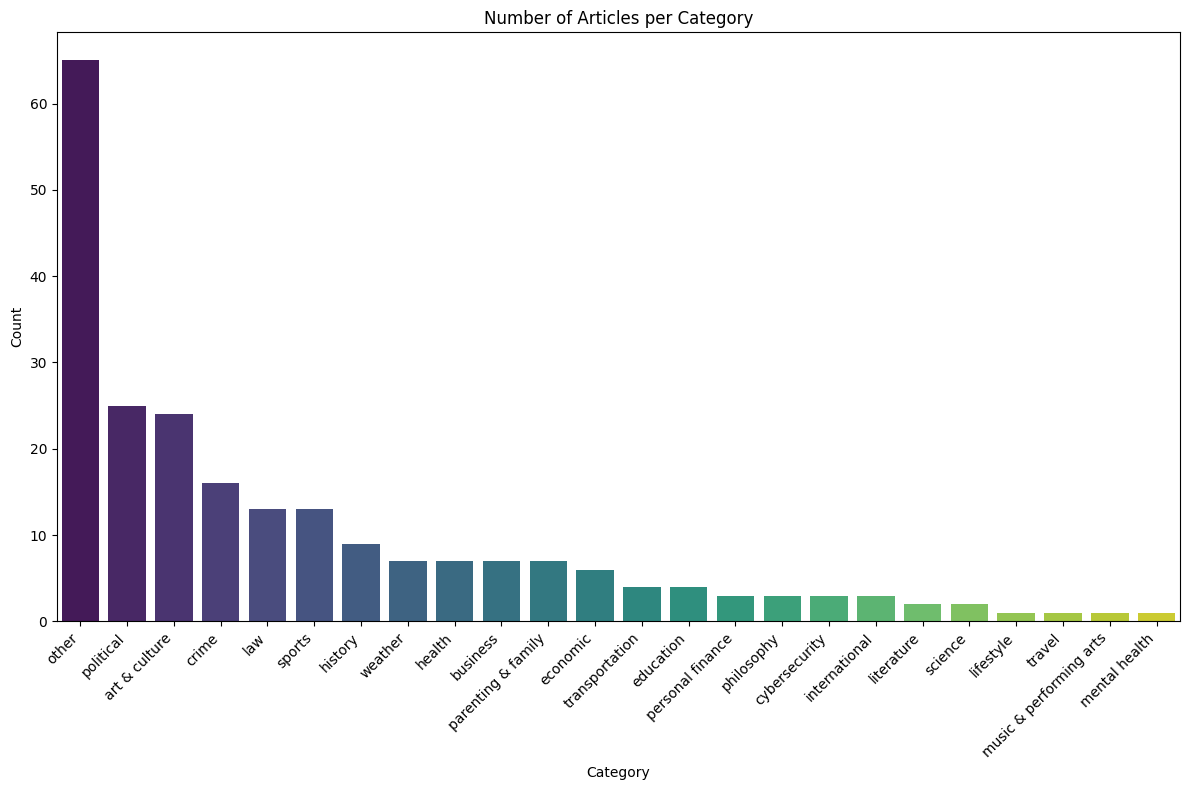

In [15]:
# Visualize Category Distribution or Calculate the counts of each category
category_counts = data['Category'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Number of Articles per Category")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<ipython-input-16-fd00f3df354e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Category'], kde=False, bins=len(data['Category'].unique()), palette="viridis")


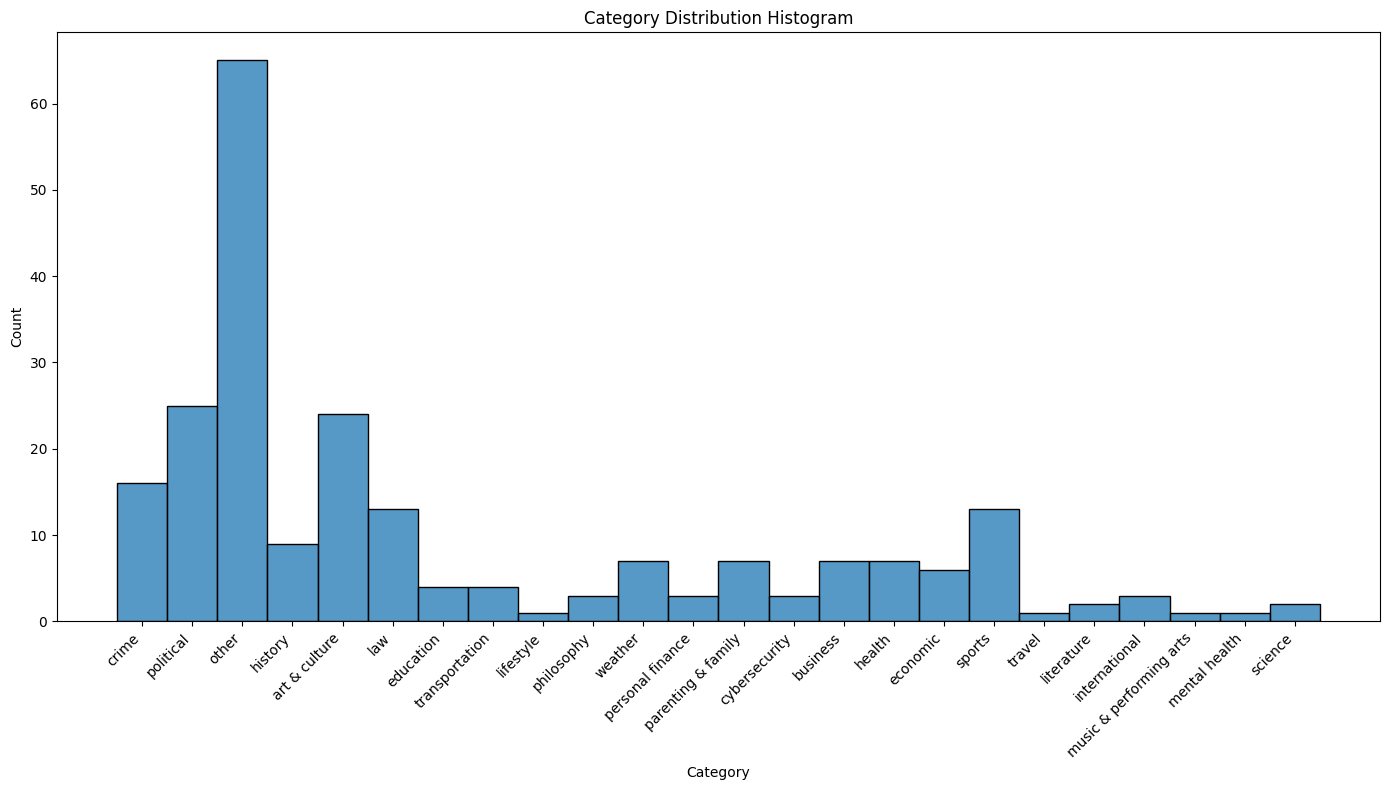

In [16]:
# Visualize Category Distribution (Histogram)
plt.figure(figsize=(14, 8))
#sns.histplot(data['Category'], kde=False, bins=len(data['Category'].unique()), palette="viridis")
sns.histplot(data['Category'], kde=False, bins=len(data['Category'].unique()), palette="")
plt.title("Category Distribution Histogram")
plt.xlabel("Category")
plt.ylabel("Count")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

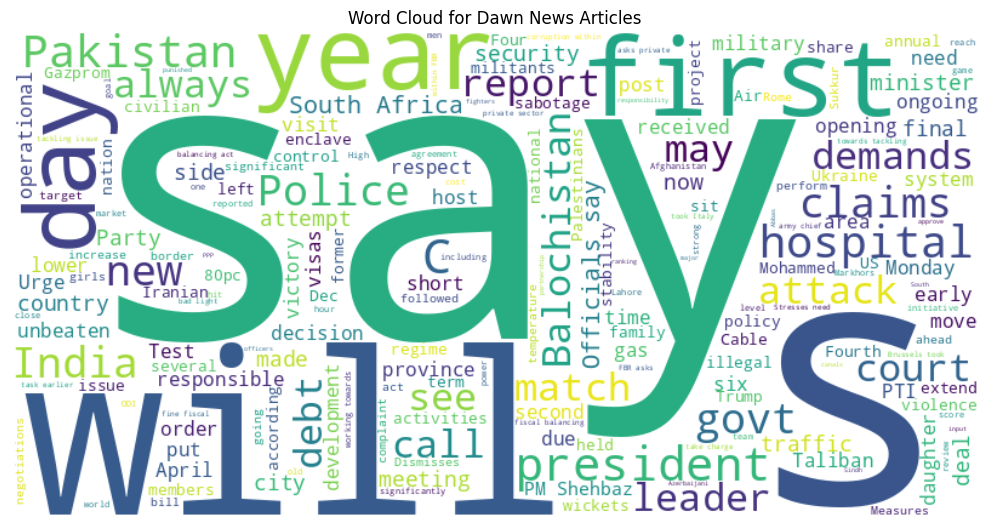

In [17]:
text_data = " ".join(data['Summary'].dropna())  # Join all text into one large string, handling NaN values

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis for a cleaner view
plt.title('Word Cloud for Dawn News Articles')
plt.tight_layout()
plt.show()

***Step # 02: Text Pre-Processing***

***Count Null Values***

In [18]:
count=data.isnull().sum().sort_values(ascending=False)
percentage=((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])
print("Count and Percentage of missing values for the columns: ")
missing_data

Count and Percentage of missing values for the columns: 


,Count,Percentage
Summary,21,9.251101
Title,0,0.000000
Link,0,0.000000
Category,0,0.000000


***Replace Null Values with "Missing"***

In [19]:
# Fill missing values with "missing" for 'Title' and 'Summary' columns
data['Title'] = data['Title'].fillna("missing")
data['Summary'] = data['Summary'].fillna("missing")

# Verification
print(data.isnull().sum())

Title       0
Summary     0
Link        0
Category    0
dtype: int64


***Drop Unnecessary Columns***

In [20]:
data.drop(columns=['Title','Link'],inplace=True)
data.head()

,Summary,Category
0,Ansar al-Furqan claims responsibility for attack.,crime
1,Says PPP being left out of major policy decisi...,political
2,"Azerbaijani president demands public apology, ...",other
3,Those arrested include former regime informant...,crime
4,Says working towards tackling issue of corrupt...,history


***Encoding Labels in Numeric Format***

In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
data['Category'] = label_encoder.fit_transform(data['Category'])

# To see the mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'art & culture': 0, 'business': 1, 'crime': 2, 'cybersecurity': 3, 'economic': 4, 'education': 5, 'health': 6, 'history': 7, 'international': 8, 'law': 9, 'lifestyle': 10, 'literature': 11, 'mental health': 12, 'music & performing arts': 13, 'other': 14, 'parenting & family': 15, 'personal finance': 16, 'philosophy': 17, 'political': 18, 'science': 19, 'sports': 20, 'transportation': 21, 'travel': 22, 'weather': 23}


***Verifying Conversion***

In [22]:
labels=data.Category
labels.head()

,Category
0,2
1,18
2,14
3,2
4,7


***Removing Stop Words and Doing Lemmatization (Text Pre-Processing)***

In [23]:
def clean_input(text, remove_stop_words=True, lemmatize_words=False):
    stop_words = set(stopwords.words('english'))  # Load NLTK stopwords
    text = text.lower()
    text = re.sub(r"http\S+", "link", text)
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\bI\b", "I am", text)
    text = re.sub(r"\bur\b", "your", text)
    text = re.sub(r"\band\b", " and ", text)
    text = re.sub(r"\bd\b", " would", text)
    text = re.sub(r"\b11\b", "will", text)
    text = re.sub(r"\bc\b", "can", text)
    text = re.sub(r"\breg\b", "eg", text)
    text = re.sub(r"\btkts\b", "tickets", text)
    text = re.sub(r"\bru\b", "you", text)
    text = "".join([c for c in text if c not in punctuation])
    words = text.split()
    if remove_stop_words:
        words = [w for w in words if w not in stop_words]
    cleaned_text = " ".join(words)
    return cleaned_text

***Cleaning each Row of Dataset using Lambda Clean input()***

In [24]:
cleaned1=lambda x: clean_input(x)
data['New Data'] = pd.DataFrame(data.Summary.apply(cleaned1))
data.head(10)


,Summary,Category,New Data
0,Ansar al-Furqan claims responsibility for attack.,2,ansar alfurqan claims responsibility attack
1,Says PPP being left out of major policy decisi...,18,says ppp left major policy decisions agricultu...
2,"Azerbaijani president demands public apology, ...",14,azerbaijani president demands public apology r...
3,Those arrested include former regime informant...,2,arrested include former regime informants proi...
4,Says working towards tackling issue of corrupt...,7,says working towards tackling issue corruption...
5,Says top leadership has to approve the develop...,14,says top leadership approve developments input...
6,"Rabada, Jansen put on an unbeaten partnership ...",0,rabada jansen put unbeaten partnership see sou...
7,Says Sindh does not accept plans for new canal...,9,says sindh accept plans new canals demands pro...
8,Madressahs required to submit annual report of...,5,madressahs required submit annual report educa...
9,DIG traffic says if sit-ins continue tomorrow ...,21,dig traffic says sitins continue tomorrow mond...


***Creating a Copy of Clean Text***

In [25]:
new_train=data['New Data'].copy()
new_train.head()

,New Data
0,ansar alfurqan claims responsibility attack
1,says ppp left major policy decisions agricultu...
2,azerbaijani president demands public apology r...
3,arrested include former regime informants proi...
4,says working towards tackling issue corruption...


***Step # 04(i) : Splitting Data into Training and Testing***

In [26]:
x_train,x_test,y_train,y_test=train_test_split(new_train,labels, test_size=0.3, random_state=10)

***Step # 04(ii) : Modelling***

***Using TF-IDF***

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)

tfidf_val = tfidf_vectorizer.transform(x_test)


***Using Logistic Regression***

In [28]:
LogReg = LogisticRegression(max_iter=100)

LogReg.fit(tfidf_train, y_train)

Pred_LogReg = LogReg.predict(tfidf_val)

Accuracy_LogReg = metrics.accuracy_score(y_test, Pred_LogReg)

Accuracy_LogReg = round(Accuracy_LogReg * 100, 2)
print(f'Accuracy of Logistic Regression Model is: {Accuracy_LogReg}%')

Accuracy of Logistic Regression Model is: 28.99%


***Using Decission Tree***

In [29]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(tfidf_train, y_train)
Pred_DT = dt_classifier.predict(tfidf_val)
Accuracy_DT = metrics.accuracy_score(y_test, Pred_DT)
Accuracy_DT = round(Accuracy_DT * 100, 2)
print(f'Accuracy of Decision Tree Model is: {Accuracy_DT}%')

Accuracy of Decision Tree Model is: 63.77%


***Using Random forest***

In [30]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(tfidf_train, y_train)
Pred_RF = rf_classifier.predict(tfidf_val)
Accuracy_RF = metrics.accuracy_score(y_test, Pred_RF)
Accuracy_RF = round(Accuracy_RF * 100, 2)
print(f'Accuracy of Random Forest Model is: {Accuracy_RF}%')

Accuracy of Random Forest Model is: 59.42%


In [31]:
#sample_text = ["AI is revolutionizing various industries"]

# Step 1: Vectorize the sample text using the same vectorizer
#sample_vec = tfidf_vectorizer.transform(sample_text)

# Step 2: Use the trained model to make a prediction
#predicted_class = LogReg.predict(sample_vec)

# Print the prediction
#print(f'The predicted class for the sample text is: {predicted_class[0]}')

***Using Voting Classifier combining DT, RF, LR Predictions using Majority Voting***

In [32]:
# Define the three models for the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('Logistic Regression', LogReg),
    ('Random Forest', rf_classifier),
    ('Decision Tree', dt_classifier)
], voting='soft')
# Fit the voting classifier on the training data
voting_clf.fit(tfidf_train, y_train)
# Predict using the trained voting classifier
Pred_Voting = voting_clf.predict(tfidf_val)
# Calculate the accuracy of the voting classifier
Accuracy_Voting = accuracy_score(y_test, Pred_Voting)
Accuracy_Voting = round(Accuracy_Voting * 100, 2)
# Print the accuracy of the voting classifier
print(f'Accuracy of Voting Classifier is: {Accuracy_Voting}%')

Accuracy of Voting Classifier is: 63.77%


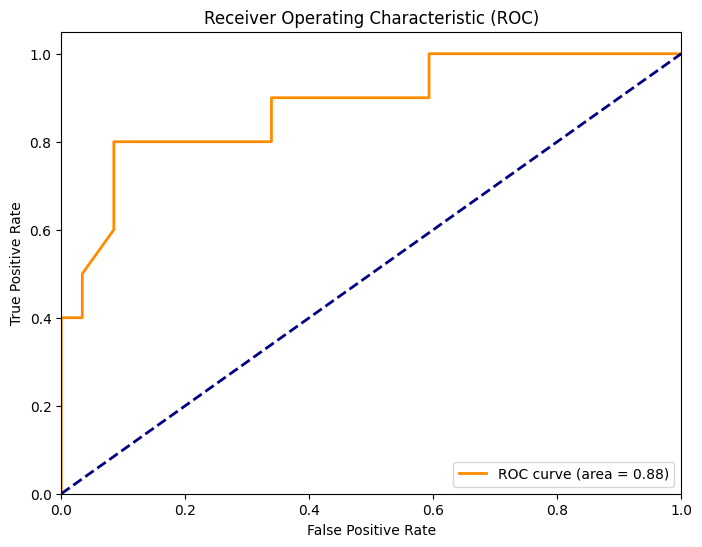

In [33]:
# Get predicted probabilities
y_probs = voting_clf.predict_proba(tfidf_val)

# Compute ROC curve and AUC for class 0 (adjust class as needed)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 0], pos_label=0)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

***Results & Comparision***

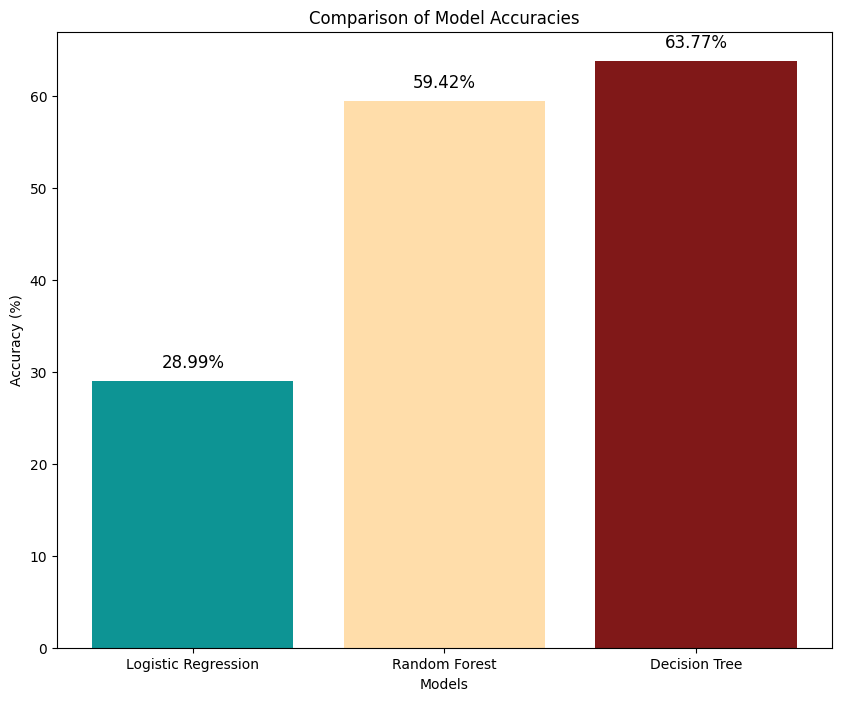

In [34]:
# Models and accuracies for comparison (3 models)
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [Accuracy_LogReg, Accuracy_RF, Accuracy_DT]  # Replace with actual accuracy values

# Create bar plot
plt.figure(figsize=(10, 8))
bars = plt.bar(models, accuracies, color=['#0D9494', '#FFDDAA', '#801818'])  # Custom colors for better contrast

# Labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')

# Add accuracy labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}%', ha='center', va='bottom', fontsize=12)

# Display plot
plt.show()


***Business Questions / Insights***

In [35]:
data = pd.read_csv("dawn_news.csv")

In [36]:
# 1. Which category has the most news articles?
most_articles_category = data['Category'].value_counts().idxmax()
print(f"Category with the most news articles: {most_articles_category}")

Category with the most news articles: other


In [37]:
# 3. What is the percentage distribution of each news category?
category_percentage = data['Category'].value_counts(normalize=True) * 100
print("\nPercentage distribution of each news category:")
print(category_percentage)


Percentage distribution of each news category:
Category
other                      28.634361
political                  11.013216
art & culture              10.572687
crime                       7.048458
law                         5.726872
sports                      5.726872
history                     3.964758
weather                     3.083700
health                      3.083700
business                    3.083700
parenting & family          3.083700
economic                    2.643172
transportation              1.762115
education                   1.762115
personal finance            1.321586
philosophy                  1.321586
cybersecurity               1.321586
international               1.321586
literature                  0.881057
science                     0.881057
lifestyle                   0.440529
travel                      0.440529
music & performing arts     0.440529
mental health               0.440529
Name: proportion, dtype: float64


In [38]:
# 6. What percentage of news articles relate directly to business and financial markets?
business_category_df = data[data['Category'].str.contains('Business|Finance', case=False)]
business_percentage = (business_category_df.shape[0] / data.shape[0]) * 100
print(f"Percentage of news articles related to Business and Financial markets: {business_percentage:.2f}%")


Percentage of news articles related to Business and Financial markets: 4.41%


In [39]:
# 8. What are the top-performing categories in terms of engagement (e.g., popularity or readership)?
top_categories_by_articles = data['Category'].value_counts().head(5)
print("\nTop performing categories based on number of articles:")
print(top_categories_by_articles)


Top performing categories based on number of articles:
Category
other            65
political        25
art & culture    24
crime            16
law              13
Name: count, dtype: int64


In [40]:
# 9. Which category had the fewest articles published on?
fewest_articles_category = data['Category'].value_counts().idxmin()
print(f"Category with the fewest articles published: {fewest_articles_category}")

Category with the fewest articles published: lifestyle
